In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
df = pd.read_csv('Loan_Data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis and Visualization

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

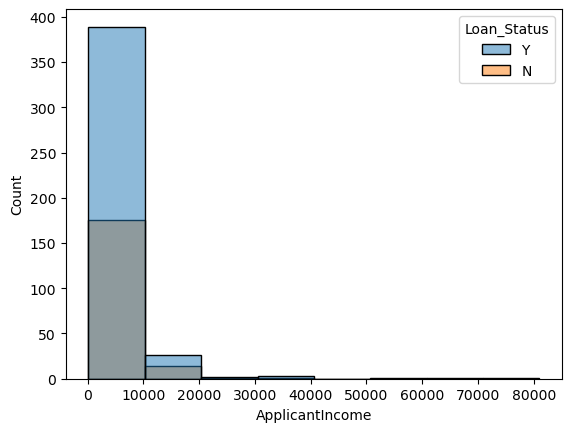

In [434]:
sns.histplot(data=df, x='ApplicantIncome', bins=8,hue='Loan_Status')

### Applicant Income less than 13k
Histogram

In [435]:
df1=df[df['ApplicantIncome']<13000]

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

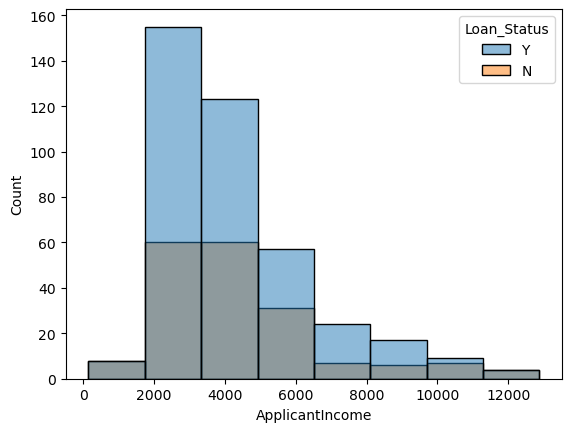

In [436]:
sns.histplot(data=df1, x='ApplicantIncome', bins=8,hue='Loan_Status')

Loan Status

In [276]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [277]:
ddf_1 = df[df["Credit_History"]==1]

In [278]:
ddf_0 = df[df["Credit_History"]==0]

### Histograms / Bars

<AxesSubplot:xlabel='Education', ylabel='count'>

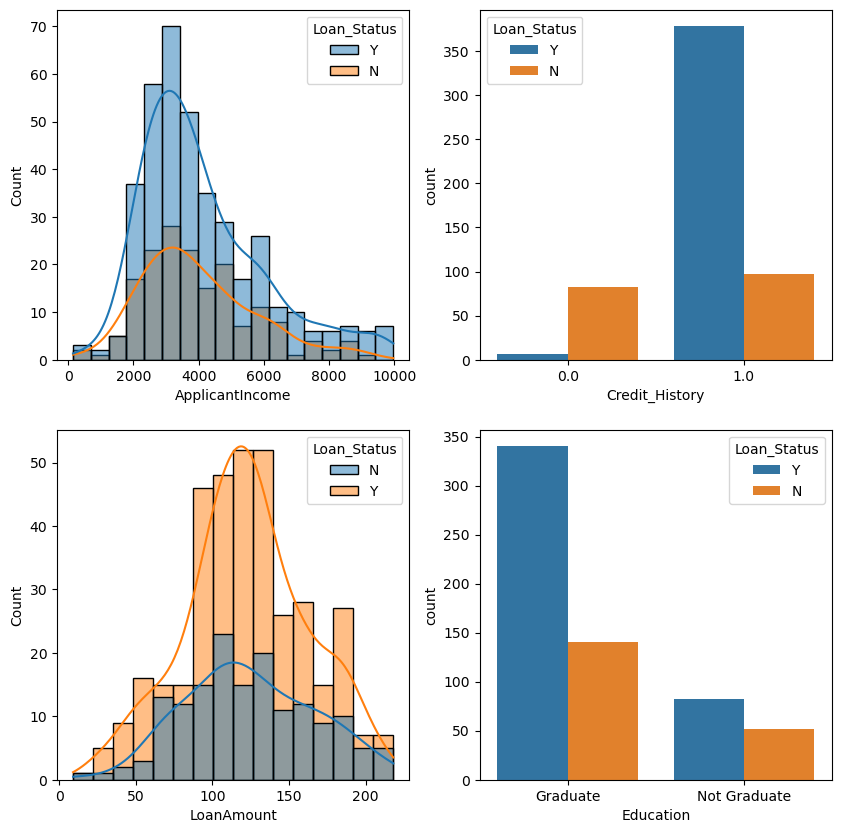

In [279]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df[df["ApplicantIncome"]<10000], x="ApplicantIncome", hue="Loan_Status",  kde=True, ax=axs[0, 0])
axs.flatten()
sns.histplot(data=df[df['LoanAmount']<220], x="LoanAmount", hue="Loan_Status", kde=True, ax=axs[1, 0])
sns.countplot(data=df, x="Credit_History", hue="Loan_Status", ax=axs[0, 1])
#sns.countplot(data=df, x="Property_Area", hue="Loan_Status", ax=axs[1, 1])
sns.countplot(data=df, x="Education", hue="Loan_Status", ax=axs[1, 1])



### Histograms
Positive Credit History

<AxesSubplot:xlabel='Education', ylabel='count'>

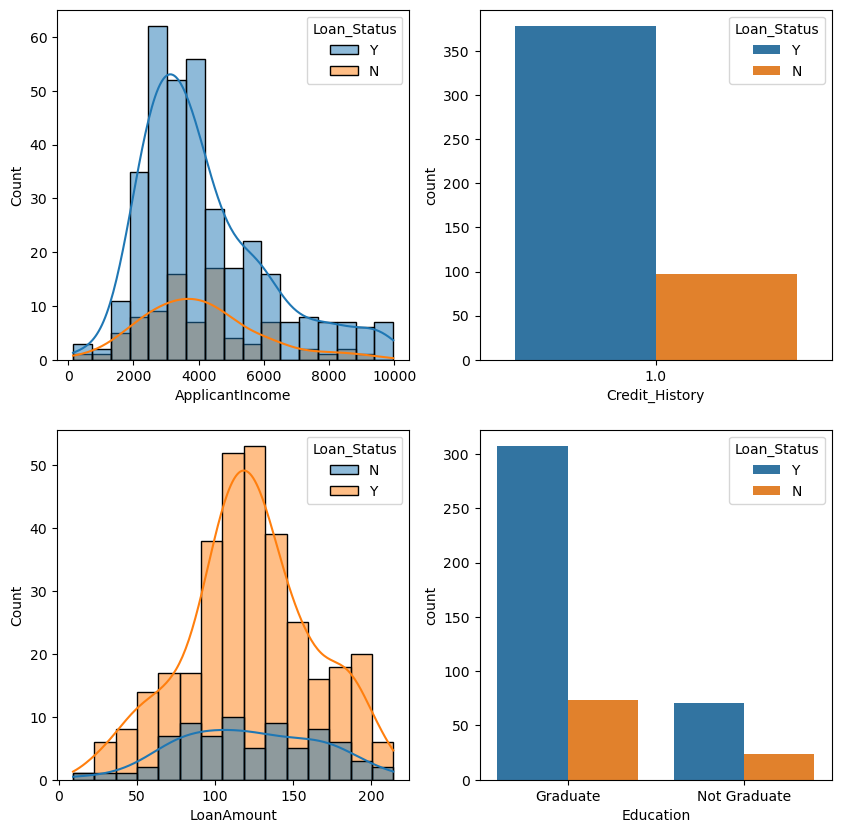

In [280]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=ddf_1[ddf_1["ApplicantIncome"]<10000], x="ApplicantIncome", hue="Loan_Status",  kde=True, ax=axs[0, 0])
axs.flatten()
sns.histplot(data=ddf_1[ddf_1['LoanAmount']<220], x="LoanAmount", hue="Loan_Status", kde=True, ax=axs[1, 0])
s1 = sns.countplot(data=ddf_1, x="Credit_History", hue="Loan_Status", ax=axs[0, 1])
#sns.countplot(data=ddf_1, x="Property_Area", hue="Loan_Status", ax=axs[1, 1])
sns.countplot(data=ddf_1, x="Education", hue="Loan_Status", ax=axs[1, 1])

# stackoverflow - ask about value labels

### Histograms
Negative Credit History

In [281]:
# why, despite Credit_History equals 1, some people didn't receive a loan?
ddf_1_N = ddf_1[ddf_1["Loan_Status"]=='N']

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

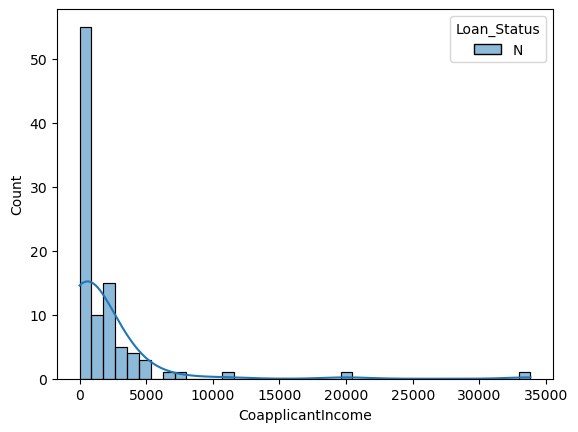

In [282]:

sns.histplot(data=ddf_1_N, x="CoapplicantIncome", hue="Loan_Status", kde=True)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

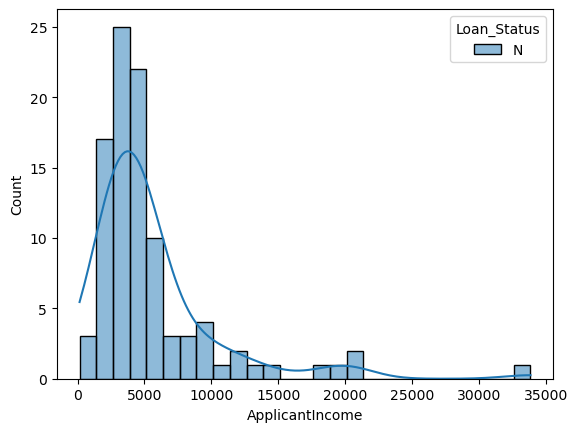

In [283]:

sns.histplot(data=ddf_1_N, x="ApplicantIncome", hue="Loan_Status", kde=True)


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

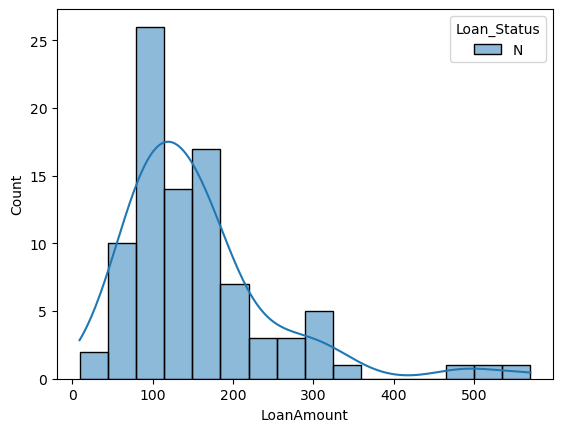

In [284]:
sns.histplot(data=ddf_1_N, x="LoanAmount", hue="Loan_Status", kde=True)


<AxesSubplot:xlabel='Education', ylabel='Count'>

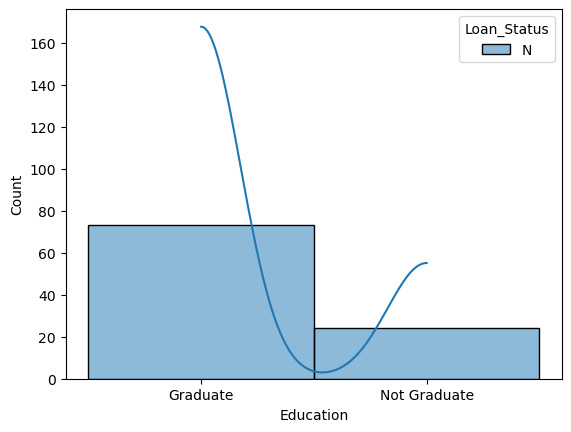

In [285]:
sns.histplot(data=ddf_1_N, x="Education", hue="Loan_Status", kde=True)

### Scatter plots 
Relationship between two continuous features

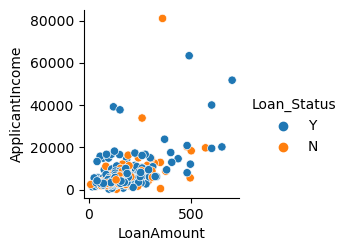

In [291]:
sns.pairplot(data=df, x_vars='LoanAmount',y_vars='ApplicantIncome',hue='Loan_Status')

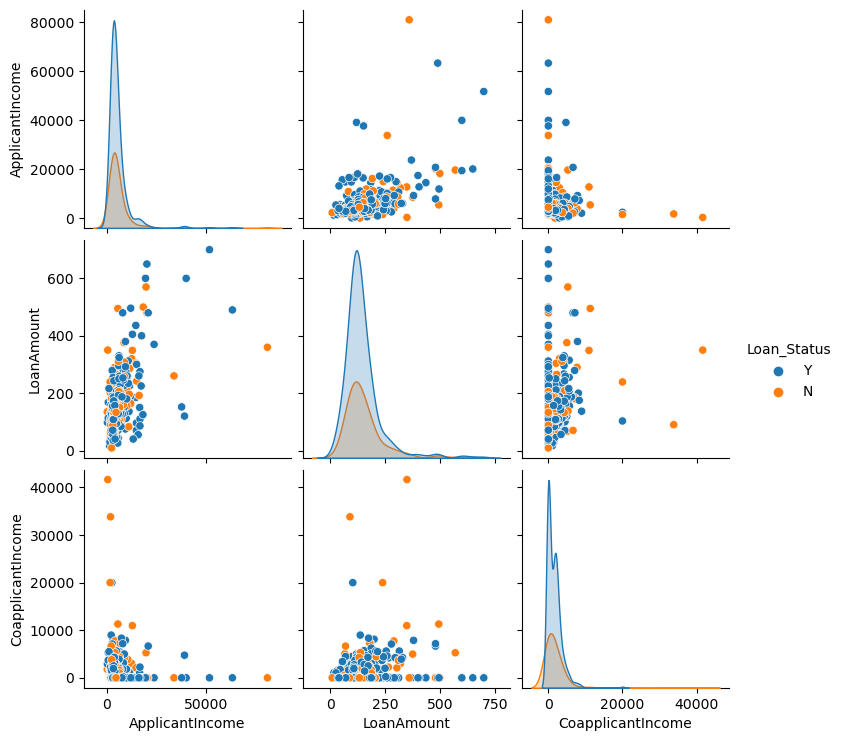

In [293]:
sns.pairplot(data=df[['ApplicantIncome','LoanAmount','Loan_Status','CoapplicantIncome']],hue='Loan_Status')

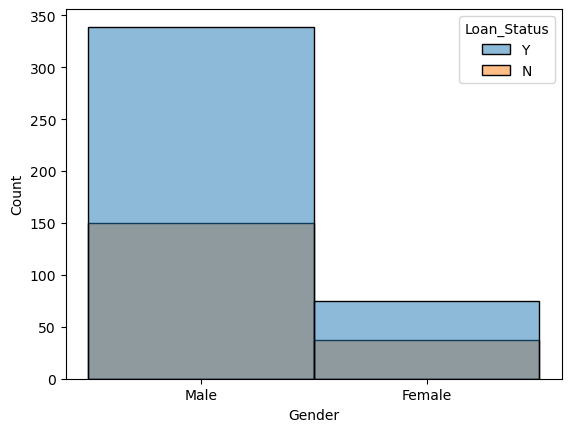

In [295]:
pp = sns.histplot(data=df, x='Gender', hue='Loan_Status')


<AxesSubplot:xlabel='Married', ylabel='Count'>

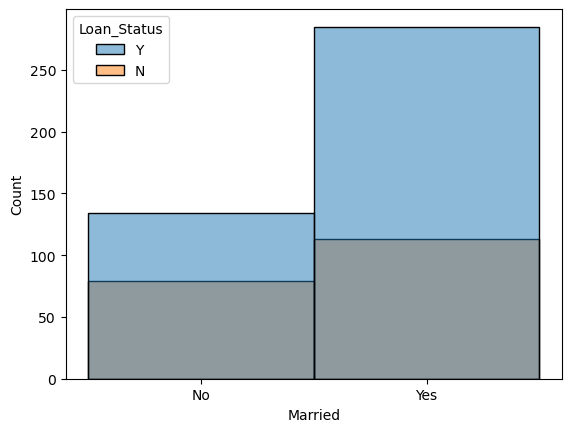

In [296]:
sns.histplot(data=df, x='Married', hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='Count'>

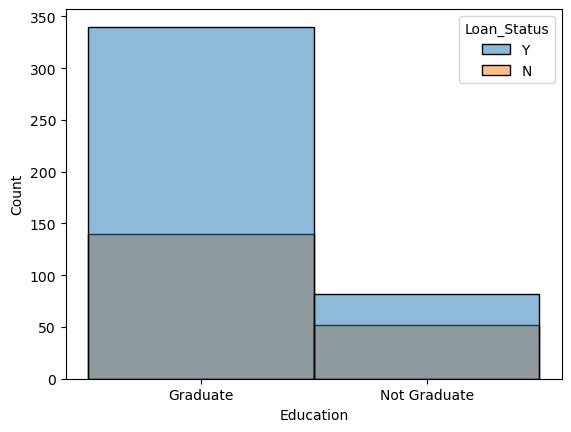

In [297]:

sns.histplot(data=df, x='Education', hue='Loan_Status')

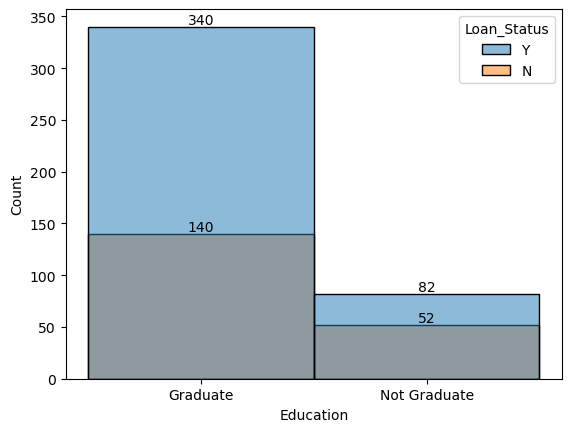

In [298]:
ax =sns.histplot(data=df, x='Education', hue='Loan_Status')
for container in ax.containers:
    ax.bar_label(container)


In [299]:
df.groupby(['Loan_Status','Education']).size()

Loan_Status  Education   
N            Graduate        140
             Not Graduate     52
Y            Graduate        340
             Not Graduate     82
dtype: int64

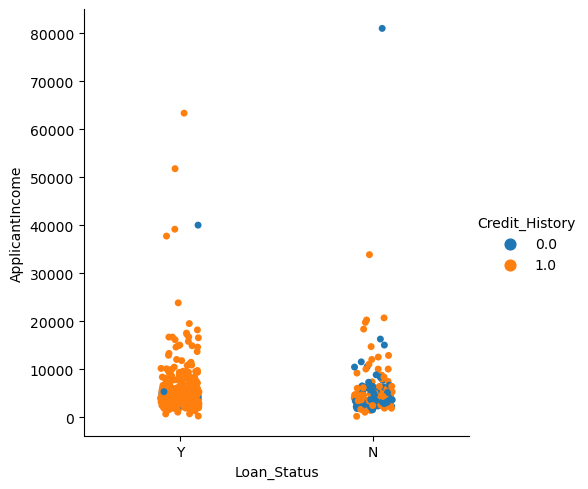

In [300]:
sns.catplot(data=df, y='ApplicantIncome', x='Loan_Status',hue='Credit_History')

### Scatter plots - Positive Credit History

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

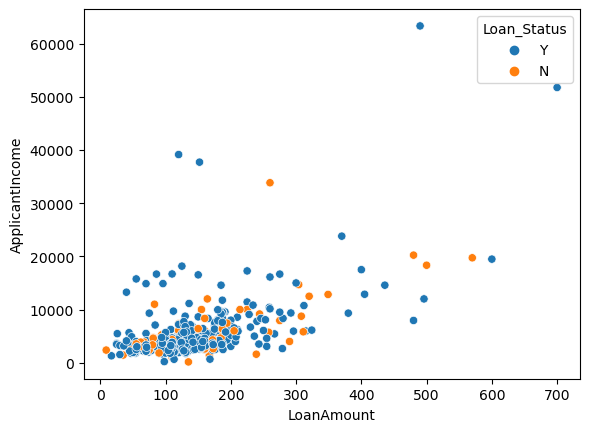

In [301]:
sns.scatterplot(data=ddf_1, y='ApplicantIncome',x='LoanAmount',hue='Loan_Status')

In [302]:
from sklearn.model_selection import train_test_split

### Feature engineering 

In [437]:
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2': 2, '3+':3})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [438]:
df1 = df.drop('Loan_ID',axis=1)
df1 = pd.get_dummies(df1, drop_first=True)
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [307]:
df1.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_Y               0
dtype: int64

In [439]:
df1 = df1.dropna()

In [440]:
df1.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [441]:
X = df1.drop('Loan_Status_Y',axis=1)
y = df1['Loan_Status_Y']

### Headmap

<AxesSubplot:>

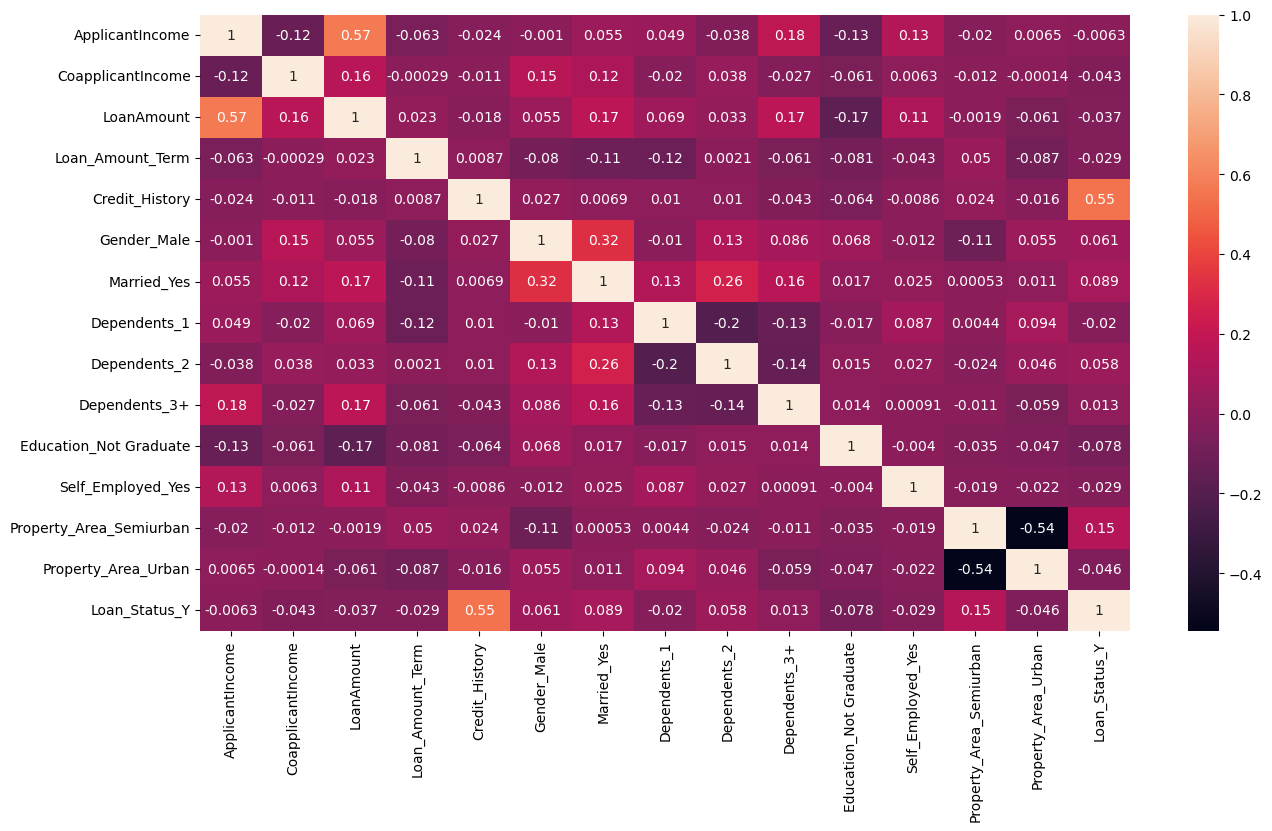

In [312]:
plt.figure(figsize = (15,8))
sns.heatmap(df1.corr(),annot=True)

In [315]:
pd.Series(abs(df1.corr()['Loan_Status_Y'])).sort_values()

ApplicantIncome            0.006281
Dependents_3+              0.012706
Dependents_1               0.020169
Loan_Amount_Term           0.028601
Self_Employed_Yes          0.029373
LoanAmount                 0.036642
CoapplicantIncome          0.043353
Property_Area_Urban        0.045591
Dependents_2               0.057765
Gender_Male                0.061462
Education_Not Graduate     0.078434
Married_Yes                0.089226
Property_Area_Semiurban    0.145712
Credit_History             0.547439
Loan_Status_Y              1.000000
Name: Loan_Status_Y, dtype: float64

### Multicollinearity
    Variance inflation factor

In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [442]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature        VIF
0                Dependents   1.904280
1           ApplicantIncome   2.819687
2         CoapplicantIncome   1.558983
3                LoanAmount   6.652136
4          Loan_Amount_Term  10.752150
5            Credit_History   6.256959
6               Gender_Male   5.321662
7               Married_Yes   3.595635
8    Education_Not Graduate   1.275773
9         Self_Employed_Yes   1.176176
10  Property_Area_Semiurban   2.251864
11      Property_Area_Urban   1.935979


In [443]:
X = X.drop('Loan_Amount_Term',axis=1)

In [444]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feabture
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature       VIF
0                Dependents  1.903775
1           ApplicantIncome  2.809570
2         CoapplicantIncome  1.558744
3                LoanAmount  5.971573
4            Credit_History  4.630460
5               Gender_Male  4.880862
6               Married_Yes  3.594090
7    Education_Not Graduate  1.250058
8         Self_Employed_Yes  1.174278
9   Property_Area_Semiurban  2.024673
10      Property_Area_Urban  1.811004


In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [446]:
from sklearn.preprocessing import StandardScaler

In [447]:
scaler = StandardScaler()

In [448]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelling 

In [449]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb


In [450]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(max_iter=1000000)))

# Neural Network
# models.append(('NN', MLPClassifier(max_iter=2000)))

# Ensemble Models
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('XGB', xgb.XGBClassifier()))

In [327]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [451]:
res = pd.DataFrame(columns=['model', 'mean', 'std'])
res

,model,mean,std


### Cross validation
    Multiple Models Comparison

In [452]:
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    res = pd.concat([res,pd.DataFrame({'model': [name], 'mean': [cv_results.mean()],'std': [cv_results.std()]},columns=['model', 'mean', 'std'] )])
    
    
res = res.reset_index(drop=True)   

LR: 0.786937 (0.063475)
LDA: 0.789715 (0.059873)
KNN: 0.764790 (0.062314)
CART: 0.698123 (0.082534)
NB: 0.792492 (0.062422)
SVC: 0.792568 (0.066710)
AB: 0.751051 (0.067096)
GBM: 0.753529 (0.080685)
RF: 0.770195 (0.053610)
ET: 0.753604 (0.070125)
XGB: 0.759384 (0.063476)


#### Performance verification

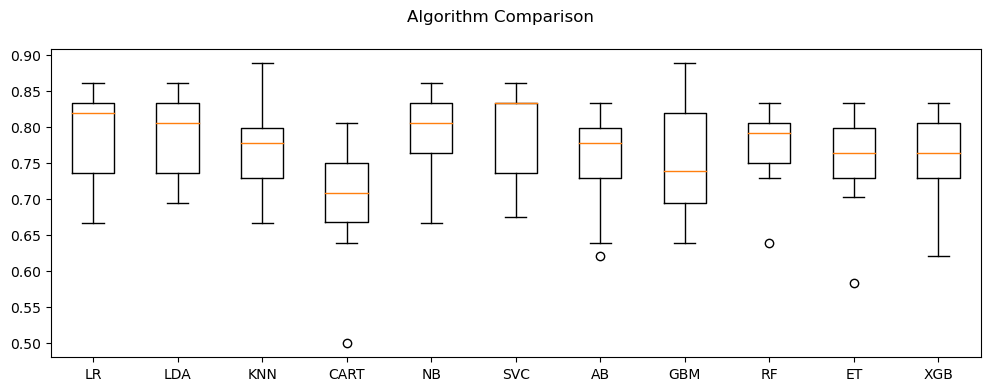

In [453]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(12,4)
pyplot.show()

In [454]:
res.sort_values('mean',ascending=False)

,model,mean,std
5,SVC,0.792568,0.066710
4,NB,0.792492,0.062422
1,LDA,0.789715,0.059873
0,LR,0.786937,0.063475
8,RF,0.770195,0.053610
2,KNN,0.764790,0.062314
10,XGB,0.759384,0.063476
9,ET,0.753604,0.070125
7,GBM,0.753529,0.080685
6,AB,0.751051,0.067096


#### Cross validation Vs Prediction

In [455]:
rm = pd.DataFrame(columns=['name','acc'])

In [456]:
for m in models:
    ml = m[1]
    ml.fit(X_train,y_train)
    p = ml.predict(X_test)
    
    print("%f (%s)" % (accuracy_score(p,y_test),m[0]))
    rm = pd.concat([rm, pd.DataFrame({'name':[m[0]],'acc': [accuracy_score(p,y_test)]})],ignore_index=True)

0.858974 (LR)
0.858974 (LDA)
0.794872 (KNN)
0.743590 (CART)
0.839744 (NB)
0.852564 (SVC)
0.788462 (AB)
0.794872 (GBM)
0.839744 (RF)
0.788462 (ET)
0.807692 (XGB)


In [457]:
rm.sort_values('acc',ascending=False)

,name,acc
0,LR,0.858974
1,LDA,0.858974
5,SVC,0.852564
4,NB,0.839744
8,RF,0.839744
10,XGB,0.807692
2,KNN,0.794872
7,GBM,0.794872
6,AB,0.788462
9,ET,0.788462


### Random Forest for feature selection 
    vs Headmap

In [458]:
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)
p = rf1.predict(X_test)
accuracy_score(p,y_test)

0.8461538461538461

In [459]:
X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [460]:
rf1.feature_importances_


array([0.04814802, 0.22008233, 0.12059398, 0.21504799, 0.23092522,
       0.02766104, 0.024613  , 0.03047536, 0.02103825, 0.03916429,
       0.02225051])

In [461]:
tbr = pd.DataFrame({'imp': rf1.feature_importances_, 'name': X.columns})
tbr 

,imp,name
0,0.048148,Dependents
1,0.220082,ApplicantIncome
2,0.120594,CoapplicantIncome
3,0.215048,LoanAmount
4,0.230925,Credit_History
5,0.027661,Gender_Male
6,0.024613,Married_Yes
7,0.030475,Education_Not Graduate
8,0.021038,Self_Employed_Yes
9,0.039164,Property_Area_Semiurban


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

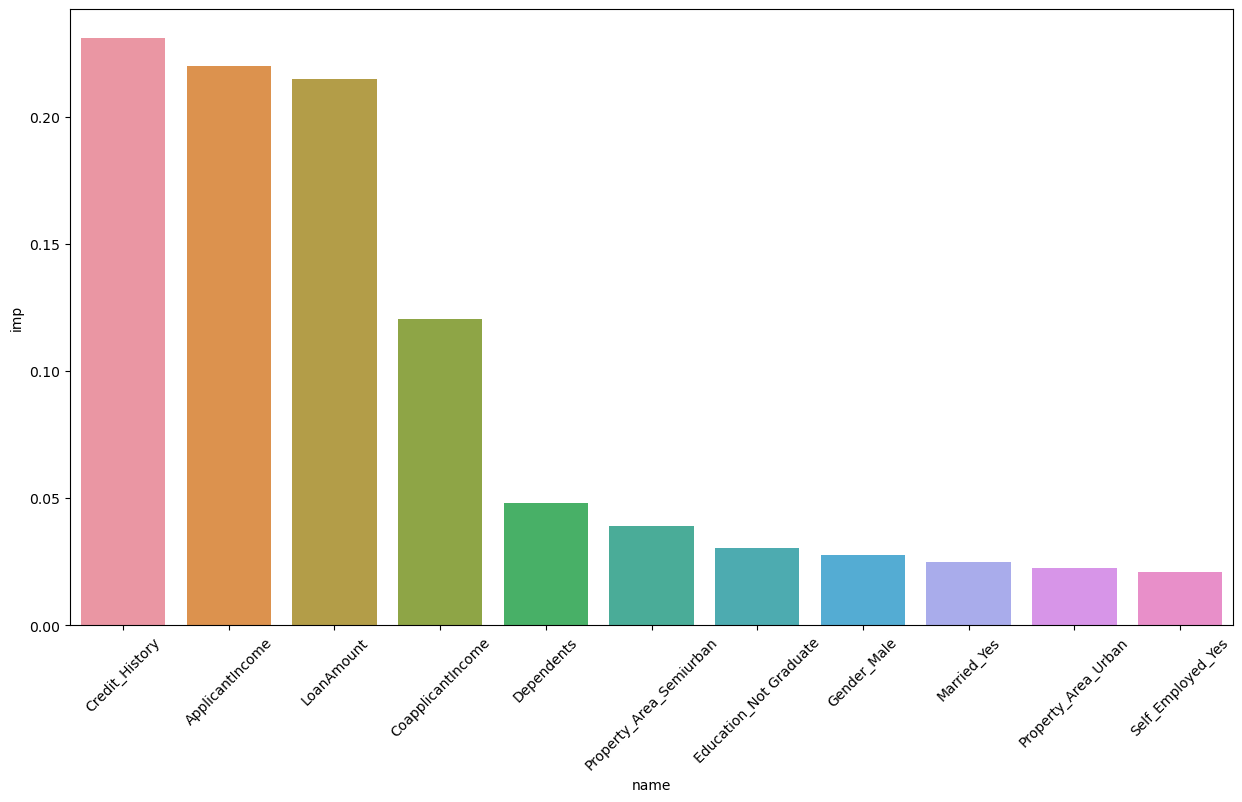

In [462]:
plt.figure(figsize = (15,8))
sns.barplot(data=tbr, y='imp', x='name',order=tbr.sort_values('imp',ascending=False).name)
plt.xticks(rotation=45)[0]


In [341]:
tbr.sort_values('imp',ascending=False).name

3              Credit_History
0             ApplicantIncome
2                  LoanAmount
1           CoapplicantIncome
11    Property_Area_Semiurban
5                 Married_Yes
12        Property_Area_Urban
4                 Gender_Male
9      Education_Not Graduate
7                Dependents_2
6                Dependents_1
10          Self_Employed_Yes
8               Dependents_3+
Name: name, dtype: object

### Limit Features to most important onces based on feature_importances_
 - X_train0, X_test0, y_train0, y_test0

In [387]:
X0 = df1[['ApplicantIncome','Credit_History','LoanAmount','CoapplicantIncome','Property_Area_Semiurban']]
y0 = df1[['Loan_Status_Y']]

In [388]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.3, random_state=42)
X_train0 = scaler.fit_transform(X_train0)
X_test0 = scaler.transform(X_test0)

In [389]:
rf0 = LogisticRegression()
rf0.fit(X_train0,y_train0)
p = rf0.predict(X_test0)
accuracy_score(p,y_test0)

C:\Users\annam\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8176100628930818

the accuracy is worse than the orginal version (0.839744)

In [463]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [479]:
df.shape

(614, 13)

In [522]:
n = Sequential()

In [523]:
n.add(Dense(30,activation='relu'))
n.add(Dropout(0.5))
n.add(Dense(15,activation='relu'))
n.add(Dropout(0.5))
n.add(Dense(1,activation='sigmoid'))


In [524]:
n.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [525]:
hist = n.fit(x=X_train, y=y_train, epochs=100, verbose=1, validation_data=(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 1s 10ms/step - loss: 0.7637 - accuracy: 0.5374 - val_loss: 0.6711 - val_accuracy: 0.6154
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7879 - accuracy: 0.5374 - val_loss: 0.6454 - val_accuracy: 0.6795
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7263 - accuracy: 0.5900 - val_loss: 0.6232 - val_accuracy: 0.7244
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.5762 - val_loss: 0.6069 - val_accuracy: 0.7628
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7304 - accuracy: 0.5956 - val_loss: 0.5964 - val_accuracy: 0.7692
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7148 - accuracy: 0.5679 - val_loss: 0.5866 - val_accuracy: 0.7628
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.6066 - val_loss: 0.5759 - val_accuracy: 0.7885
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7950 - val_loss: 0.4342 - val_accuracy: 0.8590
Epoch 60/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.7673 - val_loss: 0.4335 - val_accuracy: 0.8590
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7701 - val_loss: 0.4337 - val_accuracy: 0.8590
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7784 - val_loss: 0.4346 - val_accuracy: 0.8590
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.7535 - val_loss: 0.4353 - val_accuracy: 0.8590
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.7756 - val_loss: 0.4339 - val_accuracy: 0.8590
Epoch 65/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7562 - val_loss: 0.4321 - val_accuracy: 0.8526
Epoch 

In [526]:
pred_class = np.where(n.predict(X_test) > 0.5, 1, 0)

5/5 [==============================] - 0s 1ms/step


In [527]:
accuracy_score(y_test,pred_class)

0.8589743589743589

In [528]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.85      0.99      0.91       117

    accuracy                           0.86       156
   macro avg       0.90      0.73      0.77       156
weighted avg       0.87      0.86      0.84       156



In [529]:
hist.history

{'loss': [0.7637437582015991,
  0.7879030704498291,
  0.7262726426124573,
  0.7274560332298279,
  0.730355978012085,
  0.714786171913147,
  0.6798487305641174,
  0.6251327991485596,
  0.6669973731040955,
  0.6565635800361633,
  0.6420949101448059,
  0.6629690527915955,
  0.5896738171577454,
  0.6551359295845032,
  0.650891125202179,
  0.6020347476005554,
  0.6356106996536255,
  0.6215999722480774,
  0.5977757573127747,
  0.560996413230896,
  0.5838305354118347,
  0.5661489963531494,
  0.6376191973686218,
  0.6246147751808167,
  0.5613824725151062,
  0.6067811250686646,
  0.5830631256103516,
  0.5562375783920288,
  0.5655465722084045,
  0.5426963567733765,
  0.5812374353408813,
  0.5707741379737854,
  0.5705012083053589,
  0.5661833882331848,
  0.5412710309028625,
  0.5768344402313232,
  0.5537289977073669,
  0.5626824498176575,
  0.5391416549682617,
  0.5604243874549866,
  0.5542771816253662,
  0.5319223999977112,
  0.5552191734313965,
  0.5181021094322205,
  0.5137778520584106,
  0.55

<AxesSubplot:>

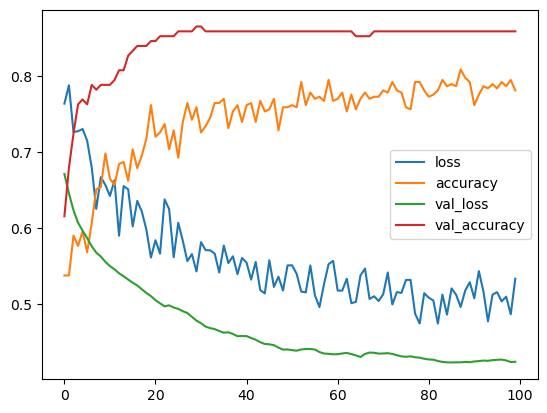

In [530]:
model_loss = pd.DataFrame(hist.history)
model_loss.plot()